# 1. 데이터 읽기

colab에서 작성 및 실행하고, 구글드라이브에서 데이터를 가져왔다.

In [2]:
#colab에서 csv파일은 용량이 작아 직접업로드 하는것도 시간이 얼마 걸리지 않지만 
#이미지나 weigths처럼 용량이 큰 데이터는 구글드라이브에 업로드 한 뒤 unzip해서 가져오는게 훨씬 편하다.
#중간에 다운되면서 런타임이 다시 연결될 때도 유용하고 매번 새로시작할 때마다 업로드 해아하는 귀찮음이 없어진다.  

!unzip /content/drive/MyDrive/elicer_col_name.zip -d /content/elice_배달데이터

Archive:  /content/drive/MyDrive/elicer_col_name.zip
  inflating: /content/elice_배달데이터/elicer_2019_col_name.csv  
  inflating: /content/elice_배달데이터/elicer_2020_1_col_name.csv  
  inflating: /content/elice_배달데이터/elicer_2020_2_col_name.csv  
  inflating: /content/elice_배달데이터/elicer_2021_col_name.csv  


In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import missingno as msno
import folium #지도출력 라이브러리

#iplot사용
#interactive한 그래프를 그릴 수 있다.
import plotly.graph_objs as go 
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
#stackoverflow
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

## 1.1 데이터 불러오기

In [4]:
#group하기 쉽도록 날짜를 datetime형식으로 읽어오기. 혹은 날짜를 년/월/일로 따로 분리하여 저장하는 후가공을 거치는 것도 생각중. 어느것이 더 편할까?
#특정 월과 연을 따로 호출하는 쿼리가 많다면 년/월/일로 나누어 저장하는 것이 효율적일것 같다.
df_2019=pd.read_csv("/content/elice_배달데이터/elicer_2019_col_name.csv", parse_dates=['날짜'])
df_2020_1=pd.read_csv("/content/elice_배달데이터/elicer_2020_1_col_name.csv", parse_dates=['날짜'])
df_2020_2=pd.read_csv("/content/elice_배달데이터/elicer_2020_2_col_name.csv", parse_dates=['날짜'])
df_2021=pd.read_csv("/content/elice_배달데이터/elicer_2021_col_name.csv", parse_dates=['날짜'])

In [ ]:
df_2019.head()
# df_2019[df_2019['날짜']<='2019-07-31'] #2019년은 8월 1일부터 존재

,날짜,시간대,광역시도,시군구,읍면동,배달건수
0,2019-08-01,0,강원도,속초시,교동,1
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4


In [ ]:
df_2021.tail() #2021년은 1월 1일부터 8월 31까지 존재

,날짜,시간대,광역시도,시군구,읍면동,배달건수
707638,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6
707639,2021-08-31,23,충청북도,제천시,신백동,6
707640,2021-08-31,23,충청북도,제천시,신월동,2
707641,2021-08-31,23,충청북도,제천시,천남동,1
707642,2021-08-31,23,충청북도,제천시,하소동,4


In [ ]:
df_2020_2.head()

,날짜,시간대,광역시도,시군구,읍면동,배달건수
0,2020-07-01,0,경기도,고양시 덕양구,삼송동,2
1,2020-07-01,0,경기도,고양시 덕양구,토당동,1
2,2020-07-01,0,경기도,고양시 덕양구,행신동,16
3,2020-07-01,0,경기도,고양시 덕양구,화정동,22
4,2020-07-01,0,경기도,고양시 일산서구,일산동,1


In [ ]:
df_2019.info() #날짜를 datetime타입으로 읽어옴

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426972 entries, 0 to 426971
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   날짜      426972 non-null  datetime64[ns]
 1   시간대     426972 non-null  int64         
 2   광역시도    426972 non-null  object        
 3   시군구     426972 non-null  object        
 4   읍면동     426972 non-null  object        
 5   배달건수    426972 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 19.5+ MB


In [ ]:
df_2020_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593847 entries, 0 to 593846
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   날짜      593847 non-null  datetime64[ns]
 1   시간대     593847 non-null  int64         
 2   광역시도    593847 non-null  object        
 3   시군구     593847 non-null  object        
 4   읍면동     593847 non-null  object        
 5   배달건수    593847 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 27.2+ MB


# 2. 데이터 정제

## 2.1 결측치 확인

In [ ]:
print("2021-----\n",df_2021.isna().sum())
print("\n2020_2-----\n",df_2020_2.isna().sum())
print("\n2020_1-----\n",df_2020_1.isna().sum())
print("\n2019-----\n",df_2019.isna().sum())

2021-----
 날짜      0
시간대     0
광역시도    0
시군구     0
읍면동     0
배달건수    0
dtype: int64

2020_2-----
 날짜      0
시간대     0
광역시도    0
시군구     0
읍면동     0
배달건수    0
dtype: int64

2020_1-----
 날짜      0
시간대     0
광역시도    0
시군구     0
읍면동     0
배달건수    0
dtype: int64

2019-----
 날짜      0
시간대     0
광역시도    0
시군구     0
읍면동     0
배달건수    0
dtype: int64


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45216 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51676 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49884 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44036 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45824 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44305 missing from current font.

/usr/local/lib/pyt

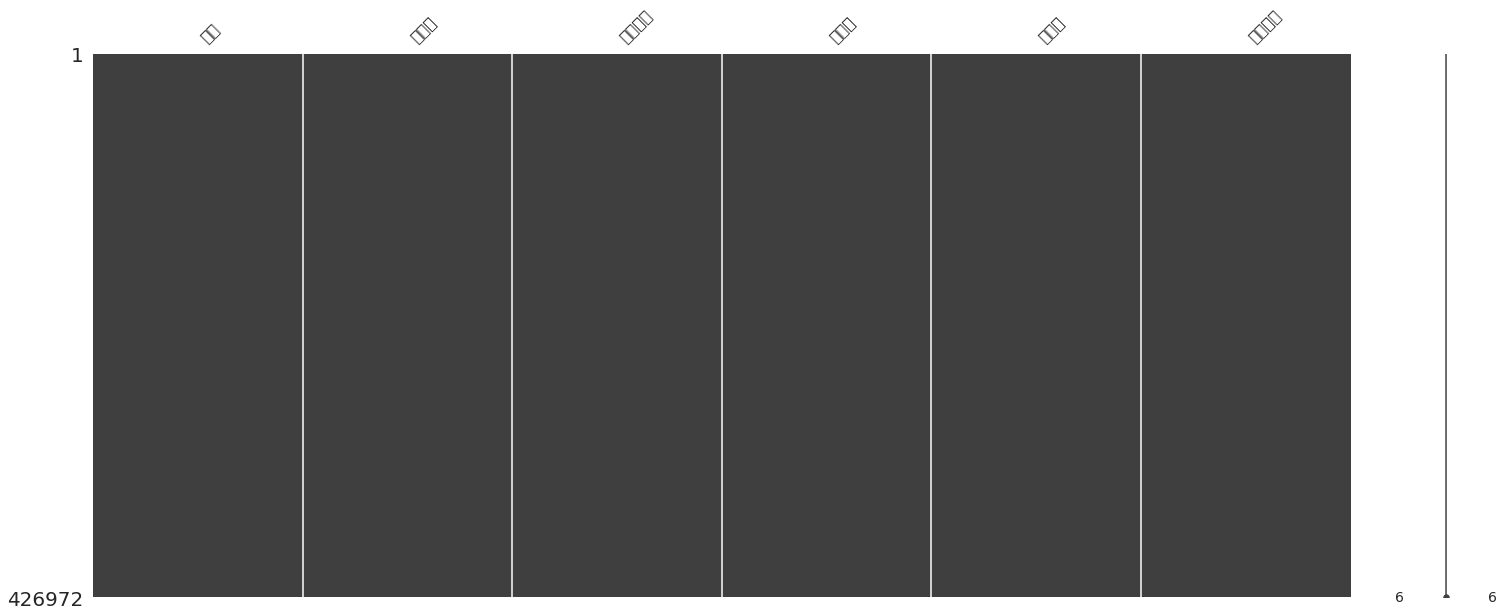

In [ ]:
#missingno를 사용하면 한글(컬럼명)이 깨진다.
font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False})
msno.matrix(df_2019)
plt.show()

## 2.2 중복값 확인

In [ ]:
#keep=False : 중복값 중 처음과 끝과 관계없이 중복이면 True
print("2021-----\n",df_2021[df_2021.duplicated(keep=False)])
print("\n2020_2-----\n",df_2020_2[df_2020_2.duplicated(keep=False)])
print("\n2020_1-----\n",df_2020_1[df_2020_1.duplicated(keep=False)])
print("\n2019-----\n",df_2019[df_2019.duplicated(keep=False)])

2021-----
 Empty DataFrame
Columns: [날짜, 시간대, 광역시도, 시군구, 읍면동, 배달건수]
Index: []

2020_2-----
 Empty DataFrame
Columns: [날짜, 시간대, 광역시도, 시군구, 읍면동, 배달건수]
Index: []

2020_1-----
 Empty DataFrame
Columns: [날짜, 시간대, 광역시도, 시군구, 읍면동, 배달건수]
Index: []

2019-----
 Empty DataFrame
Columns: [날짜, 시간대, 광역시도, 시군구, 읍면동, 배달건수]
Index: []


## 2.3 데이터 프레임 하나로 모으기

In [ ]:
df_2020 = pd.concat([df_2020_1, df_2020_2], ignore_index=True)
df_2020

,날짜,시간대,광역시도,시군구,읍면동,배달건수
0,2020-01-01,0,경기도,고양시 덕양구,토당동,2
1,2020-01-01,0,경기도,고양시 덕양구,행신동,16
2,2020-01-01,0,경기도,고양시 덕양구,화정동,28
3,2020-01-01,0,경기도,고양시 일산동구,마두동,6
4,2020-01-01,0,경기도,고양시 일산동구,백석동,18
...,...,...,...,...,...,...
1248361,2020-12-31,23,충청북도,제천시,신백동,4
1248362,2020-12-31,23,충청북도,제천시,의림동,1
1248363,2020-12-31,23,충청북도,제천시,장락동,10
1248364,2020-12-31,23,충청북도,제천시,청전동,5


In [5]:
df = pd.concat([df_2019, df_2020_1, df_2020_2, df_2021], ignore_index=True)
df

,날짜,시간대,광역시도,시군구,읍면동,배달건수
0,2019-08-01,0,강원도,속초시,교동,1
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4
...,...,...,...,...,...,...
2382976,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6
2382977,2021-08-31,23,충청북도,제천시,신백동,6
2382978,2021-08-31,23,충청북도,제천시,신월동,2
2382979,2021-08-31,23,충청북도,제천시,천남동,1


In [ ]:
df.isna().sum()

날짜      0
시간대     0
광역시도    0
시군구     0
읍면동     0
배달건수    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382981 entries, 0 to 2382980
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   날짜      datetime64[ns]
 1   시간대     int64         
 2   광역시도    object        
 3   시군구     object        
 4   읍면동     object        
 5   배달건수    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 109.1+ MB


In [ ]:
## 저장 - 파일 용량이 너무 커서 엑셀로 로드가 안됨.
# df.to_csv("/content/elice_배달데이터/elicer_2019_2021.csv", index=False, encoding="utf-8-sig")
# df.to_csv("/content/drive/MyDrive/elicer_2019_2021.csv", index=False, encoding="utf-8-sig")

## 2.4 이상값(outlier) 확인
결측치를 확인하는것만큼 이상한 값이 들어있는지 확인하는 것도 중요한 작업이다. 또한 mean을 수행하려고 한다면 더욱 필수적인데, 유독 이상한 값이 전체의 평균을 좌지우지 할지, 그래서 mean이 데이터의 의미를 표현할 수 있을지 먼저 확인해야한다. 또한 group의 지었을 때 의미를 표현할 수 있을만큼 데이터가 충분한지 등도 살펴보자. mean대신 median을 사용하는 것도 고려하는 것을 잊지 말자.

* 배달건수 최고 : 462건 => 경기도 저녁시간대. 충분히 일어날 수 있는 일이라고 생각.
* 배달건수 최저 : 1건. 음수가 아니므로 충분히 일어날 수 있는 일.
* 배달건수는 전체로 계산하면 중간값은 4건이고, 평균값은 1건이다.

In [6]:
df.describe()

,시간대,배달건수
count,2.382981e+06,2.382981e+06
mean,1.547760e+01,1.057221e+01
std,5.335301e+00,1.879402e+01
min,0.000000e+00,1.000000e+00
25%,1.200000e+01,2.000000e+00
50%,1.600000e+01,4.000000e+00
75%,1.900000e+01,1.100000e+01
max,2.300000e+01,4.620000e+02


In [7]:
df[df['배달건수']>400]

,날짜,시간대,광역시도,시군구,읍면동,배달건수
444518,2020-01-06,19,경기도,의정부시,의정부동,432
1563248,2020-12-02,18,경기도,의정부시,민락동,408
1563251,2020-12-02,18,경기도,의정부시,의정부동,426
1563538,2020-12-02,19,경기도,의정부시,민락동,462
1563541,2020-12-02,19,경기도,의정부시,의정부동,426


In [15]:
print("배달건수가 1건이었던 시간대", df[df['배달건수']<2]['시간대'].unique())
df[df['배달건수']<2].describe()

배달건수가 1건이었던 시간대 [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  5]


,시간대,배달건수
count,564006.000000,564006.0
mean,14.877572,1.0
std,5.386194,0.0
min,0.000000,1.0
25%,12.000000,1.0
50%,15.000000,1.0
75%,19.000000,1.0
max,23.000000,1.0


In [17]:
df.groupby('시군구').describe()

시간대                                   ... 배달건수                       
        count       mean       std   min   25%  ...  min  25%  50%   75%    max
시군구                                             ...                            
\N     3123.0  14.961255  3.420101   0.0  12.0  ...  1.0  1.0  1.0   2.0   16.0
강남구    4438.0  12.558585  4.380800   0.0  10.0  ...  1.0  1.0  2.0   5.0   71.0
강동구     408.0  13.193627  2.566895   0.0  11.0  ...  1.0  1.0  1.0   1.0    3.0
강릉시    1792.0  14.129464  2.612939   9.0  12.0  ...  1.0  1.0  1.0   2.0    9.0
강북구    1644.0  15.880779  4.324950   0.0  13.0  ...  1.0  2.0  6.0  11.0   50.0
...       ...        ...       ...   ...   ...  ...  ...  ...  ...   ...    ...
하남시       2.0  14.000000  1.414214  13.0  13.5  ...  1.0  1.0  1.0   1.0    1.0
함양군     817.0  15.640147  3.404906   1.0  13.0  ...  1.0  1.0  1.0   3.0   24.0
해운대구   5723.0  15.154115  3.329354   7.0  12.0  ...  1.0  1.0  1.0   2.0    9.0
홍성군     542.0  17.132841  3.339794  10.0  15.0  ...  1.0  1.0  2.0   4.0   11.0
화성시   35699.0  15.741617  4.647272   0.0  13.0  ...  1.0  2.0  4.0  13.0  148.0

[141 rows x 16 columns]

In [20]:
df.groupby('날짜').describe()

시간대                                  ... 배달건수                       
             count       mean       std  min   25%  ...  min  25%  50%   75%    max
날짜                                                  ...                            
2019-08-01  1978.0  15.851871  5.235651  0.0  13.0  ...  1.0  1.0  4.0   9.0  220.0
2019-08-02  2054.0  15.724440  5.322344  0.0  13.0  ...  1.0  2.0  4.0  10.0  237.0
2019-08-03  2202.0  15.652589  5.360398  0.0  13.0  ...  1.0  2.0  4.0  10.0  230.0
2019-08-04  2225.0  15.632360  5.144725  0.0  13.0  ...  1.0  2.0  4.0  10.0  307.0
2019-08-05  2281.0  15.898729  4.913087  0.0  13.0  ...  1.0  2.0  4.0   9.0  236.0
...            ...        ...       ...  ...   ...  ...  ...  ...  ...   ...    ...
2021-08-27  2602.0  15.622982  5.062438  0.0  13.0  ...  1.0  2.0  4.0  10.0  195.0
2021-08-28  2752.0  15.467297  5.133162  0.0  12.0  ...  1.0  2.0  4.0  12.0  212.0
2021-08-29  2756.0  15.306604  5.149099  0.0  12.0  ...  1.0  2.0  4.0  11.0  175.0
2021-08-30  2432.0  15.526727  5.092088  0.0  12.0  ...  1.0  1.0  3.0   9.0  151.0
2021-08-31  2603.0  15.646562  4.881802  0.0  13.0  ...  1.0  2.0  4.0  10.0  181.0

[754 rows x 16 columns]

# 3. 데이터 시각화



## 3.1 지역과(광역시도,시군구) 시간대 데이터 이용



먼저 2019년도 서울시 데이터를 시간대별 배달건수를 시각화하였다.

In [ ]:
df['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '대전광역시', '서울특별시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도', '경상북도', '대구광역시', '부산광역시', '광주광역시', '인천광역시',
       '울산광역시', '세종특별자치시'], dtype=object)

In [ ]:
df_seoul = df[df['광역시도']=='서울특별시'].reset_index(drop=True)
df_seoul

,날짜,시간대,광역시도,시군구,읍면동,배달건수
0,2019-08-01,0,서울특별시,구로구,개봉동,13
1,2019-08-01,0,서울특별시,구로구,고척동,4
2,2019-08-01,0,서울특별시,구로구,구로동,9
3,2019-08-01,0,서울특별시,구로구,오류동,3
4,2019-08-01,0,서울특별시,금천구,독산동,3
...,...,...,...,...,...,...
357208,2021-08-31,23,서울특별시,동작구,사당동,7
357209,2021-08-31,23,서울특별시,양천구,신정동,1
357210,2021-08-31,23,서울특별시,영등포구,신길동,5
357211,2021-08-31,23,서울특별시,영등포구,영등포동,1


### 3.1.1 시간대별 평균

In [ ]:
#reset_index를 사용하면 각 row마다 index번호가 새롭게 부여되면서 groupby에 사용했던 key들이 index가 아니라 column의 형태가 된다. 후에 검색하기 편리!

# df_seoul_2019 = df_seoul[df_seoul['날짜']<'2020-01-01'].groupby('시간대').mean().reset_index()
df_seoul_2019 = df_2019[df_2019['광역시도']=='서울특별시'].groupby('시간대').mean().reset_index()
df_seoul_2019

,시간대,배달건수
0,0,5.367156
1,1,4.019945
2,2,4.430288
3,3,5.783505
4,4,6.630137
5,5,5.534247
6,6,5.605263
7,7,5.814286
8,8,5.736842
9,9,3.473988


In [ ]:
#colab결과창에 그래프를 띄운다.
configure_plotly_browser_state()

init_notebook_mode(connected=True)

#plotly를 사용하면 interactive한 그래프로 나타낼 수 있다.
df_seoul_2019.iplot(kind="bar", 
                    y='배달건수',
                    x='시간대',
                    yTitle='배달건수',
                    xTitle='시간대',
                    title="2019 서울지역 시간대별 평균 배달건수") 

### 3.1.2 시간대별 총합
Q. 평균과 다르게 총합은 편차가 매우 크다. 왜 그럴까?

In [ ]:
df_seoul_2019 = df_2019[df_2019['광역시도']=='서울특별시'].groupby('시간대').sum().reset_index()
df_seoul_2019

,시간대,배달건수
0,0,12060
1,1,5845
2,2,1843
3,3,561
4,4,484
5,5,404
6,6,426
7,7,407
8,8,436
9,9,1803


In [ ]:
#colab결과창에 그래프를 띄운다.
configure_plotly_browser_state()

init_notebook_mode(connected=True)

#plotly를 사용하면 interactive한 그래프로 나타낼 수 있다.
df_seoul_2019.iplot(kind="bar", 
                    y='배달건수',
                    x='시간대',
                    yTitle='배달건수',
                    xTitle='시간대',
                    title="2019 서울지역 시간대별 총합 배달건수") 

2019~2021까지 서울시 용산구의 시간대별 평균과 총합 배달건수 데이터를 각각 시각화보았다.

In [ ]:
df_yongsan = df_seoul[df_seoul['시군구']=='용산구'].groupby('시간대').mean().reset_index()

configure_plotly_browser_state()

init_notebook_mode(connected=True)

#그래프 하나만 그릴 때 
dict_of_fig = dict({
    "data": [{"type": "bar",
              "x": df_yongsan['시간대'],
              "y": df_yongsan['배달건수']}],
    "layout": {"title": {"text": "서울시 용산구 시간대별 평균 주문량"},
                        }
})
fig = go.Figure(dict_of_fig)
fig.show()

In [ ]:
df_yongsan = df_seoul[df_seoul['시군구']=='용산구'].groupby('시간대').sum().reset_index()

configure_plotly_browser_state()

init_notebook_mode(connected=True)

#그래프 하나만 그릴 때 
dict_of_fig = dict({
    "data": [{"type": "bar",
              "x": df_yongsan['시간대'],
              "y": df_yongsan['배달건수']}],
    "layout": {"title": {"text": "서울시 용산구 시간대별 주문량"},
                        }
})
fig = go.Figure(dict_of_fig)
fig.show()

* 함수형태로 특정 지역을 입력받아 그 지역의 평균 배달건수 그래프를 그릴 수 있도록 만들었다. 
* 그런데 만약 한 그래프안에 시군구가 같은 지역을 그래프로 모아 그린다면 꼭 함수로 만들지 않고 그냥 for문으로 unique list로 만들어서 한번씩 넣는것이 더 짧을 것 같다.
* **Time_freq()**처럼 단순히 2019~2021데이터를 시간대별로 묶어서 평균내 시각화 하는것은 보여줄 수 있는 정보가 적은것 같다. 
  * 최소한 각 연도별로 평균을 시간대별 평균을 보여준다던지 **=> Year_Time_freq()**
  * 지도 위에다 점심시간(11 ~ 2) 사이에는 어떤 지역이 높았는지 저녁 시간(5~8) 혹은 야식시간에는 어떤, 지역이 높았는지 top3 지역을 2019년과 2021까지의 변화를 각각 표시하는것은 어떨까?


In [ ]:
def df_City_Do(City_Do='서울특별시'):
  dataFrame = df[df['광역시도']==City_Do]
  return dataFrame

def df_Si_Gun_Gu(dataframe, Si_Gun_Gu='용산구'):
  dataFrame = dataframe
  dataFrame = dataFrame[dataFrame['시군구']==Si_Gun_Gu]
  return dataFrame

In [ ]:
def Time_freq():
  print(df['광역시도'].unique())
  print("원하는 지역(광역시도)을 고르세요")
  City_Do = input()
  dataFrame = df_City_Do(City_Do)
  
  Si_Gun_Gu = ""
  #세종특별자치시는 시군구가 없다!
  if City_Do != '세종특별자치시':
    print("\n")
    print(dataFrame['시군구'].unique())
    print("원하는 지역(시군구)을 고르세요.")
    Si_Gun_Gu = input()
    dataFrame = df_Si_Gun_Gu(dataFrame, Si_Gun_Gu)
  
  #2019~2021 데이터 시간대별 평균 구하기
  dataFrame = dataFrame.groupby('시간대').mean().reset_index()
  
  #colab결과창에 그래프를 띄운다.
  configure_plotly_browser_state()

  init_notebook_mode(connected=True)

  title_str = City_Do + " " + Si_Gun_Gu + "지역 시간대별 평균 배달건수" 
  #plotly를 사용하면 interactive한 그래프로 나타낼 수 있다.
  dataFrame.iplot(kind="bar", 
                    y='배달건수',
                    x='시간대',
                    yTitle='배달건수',
                    xTitle='시간대',
                    title=title_str) 

In [ ]:
Time_freq()

['강원도' '경기도' '경상남도' '대전광역시' '서울특별시' '전라남도' '전라북도' '제주특별자치도' '충청남도' '충청북도'
 '경상북도' '대구광역시' '부산광역시' '광주광역시' '인천광역시' '울산광역시' '세종특별자치시']
원하는 지역(광역시도)을 고르세요
전라남도


['순천시' '나주시' '여수시' '광양시' '목포시']
원하는 지역(시군구)을 고르세요.
여수시


### 3.1.3 연도별 시간대별 평균

In [ ]:
def Year_Time_freq():
  print(df['광역시도'].unique())
  print("원하는 지역(광역시도)을 고르세요")
  City_Do = input()
  dataFrame = df_City_Do(City_Do)
  
  Si_Gun_Gu = ""
  #세종특별자치시는 시군구가 없다!
  if City_Do != '세종특별자치시':
    print("\n")
    print(dataFrame['시군구'].unique())
    print("원하는 지역(시군구)을 고르세요.")
    Si_Gun_Gu = input()
    dataFrame = df_Si_Gun_Gu(dataFrame, Si_Gun_Gu)
    print("\n")
  
  fig = go.Figure()
  
  #2019~2021 각각 데이터 시간대별 평균 구하기
  for year in range(2019,2022):
    dataFrame_year = dataFrame[dataFrame['날짜'].dt.year==year].groupby('시간대').mean().reset_index()
    fig.add_trace(go.Scatter(x=dataFrame_year['시간대'], y=dataFrame_year['배달건수'], 
                                mode='lines+markers', name=str(year)))
    #각 연도별 top3 시간대 저장
    top3 = dataFrame_year.sort_values(by='배달건수', ascending=False).head(3)
    top3 = list(zip(top3['시간대'].tolist(), top3['배달건수'].tolist()))
    print(top3) #줄글로 출력할 수 있도록 수정

  title_str = "2019 ~ 2021 " + City_Do + " " + Si_Gun_Gu + "지역 시간대별 평균 배달건수" 
  fig.update_layout(title='<b>'+title_str+'</b>')
  
  #colab결과창에 그래프를 띄운다.
  configure_plotly_browser_state()

  init_notebook_mode(connected=True)

  fig.show()

In [ ]:
Year_Time_freq()

['강원도' '경기도' '경상남도' '대전광역시' '서울특별시' '전라남도' '전라북도' '제주특별자치도' '충청남도' '충청북도'
 '경상북도' '대구광역시' '부산광역시' '광주광역시' '인천광역시' '울산광역시' '세종특별자치시']
원하는 지역(광역시도)을 고르세요
서울특별시


['구로구' '금천구' '마포구' '양천구' '영등포구' '은평구' '강서구' '도봉구' '성북구' '강북구' '노원구' '동작구'
 '서대문구' '관악구' '송파구' '강남구' '서초구' '용산구' '동대문구' '강동구' '중랑구' '중구' '성동구']
원하는 지역(시군구)을 고르세요.
구로구
[(19, 36.27359389895138), (18, 36.022351797862), (20, 29.50562947799386)]
[(18, 39.16401706087631), (19, 39.0061991476172), (20, 29.751592356687897)]
[(18, 18.320243737305347), (19, 17.71187631763879), (20, 13.564671101256467)]


### 3.1.4 시간대별 top3 지역
내가 만약에 창업을 할 예정이라면 어떤지역에 가게를 얻는것이 좋을까?
창업자는 내가 가게나 배달을 운영할 시간이라던지, 내 음식이 잘 팔리는 시간대는 예상이 갈 것이다. 우리가 가진 데이터에는 어떤 음식을 파는지에 대한 데이터는 없지만 지역에서 내가 원하는 시간대에 가장 많이 팔리는 동네에 내 가게를 얻는것이 좋지 않을까? 예를들면 나는 점심장사에 집중하고 싶다면 서울시 용산구의 11~1시에 가장 많이 팔리는 곳에 가게를 내면 좋을것 같다.

ex) 서울에서 가장 점심시간에 가장 핫한 곳은? => **Year_Time_top() 에서 시군구에서 '전체' 입력** <br/> 
ex) 서울시 용산구에서 점심시간에 가장 핫한 곳은? **=> Year_Time_top()**

In [ ]:
#각 연도별로 서울시 강남구에서 저녁시간에 가장 핫한 동네 3개를 알고싶다!
def Year_MealTime_top():
  print(df['광역시도'].unique())
  print("원하는 지역(광역시도)을 고르세요.")
  City_Do = input()
  dataFrame = df_City_Do(City_Do)
  
  Si_Gun_Gu = ""
  #세종특별자치시는 시군구가 없다!
  if City_Do != '세종특별자치시':
    print("\n")
    print(dataFrame['시군구'].unique())
    print("원하는 지역(시군구)을 고르세요. 전체 지역에서 보고 싶다면 '전체'를 입력하세요.")
    Si_Gun_Gu = input()
    if Si_Gun_Gu !='전체':
      dataFrame = df_Si_Gun_Gu(dataFrame, Si_Gun_Gu)
  
  row_col = [(1,1),(1,2),(2,1)]
  peakTime_list = [(11,13), (17,20), (21,23)]
  print("\n시간을 선택하세요 : 점심(11~13) or 저녁(17~20) or 야식(21~23)")
  peakTime = input()
  
  if peakTime =='점심':
    peakTime_start = peakTime_list[0][0]
    peakTime_end = peakTime_list[0][1]
  elif peakTime =='저녁':
    peakTime_start = peakTime_list[0][0]
    peakTime_end = peakTime_list[0][1]
  elif peakTime =='야식':
    peakTime_start = peakTime_list[2][0]
    peakTime_end = peakTime_list[2][1]

  fig = make_subplots(rows=2, cols=2,
                    horizontal_spacing= 0.15,
                    subplot_titles=('<b>2019 top3</b>', '<b>2020 top3</b>', '<b>2021 top3</b>')) 
  #2019~2021 각각 데이터 시간대별 평균 구하기
  for i, year in enumerate(range(2019, 2022)):
      dataFrame_year = dataFrame[(dataFrame['날짜'].dt.year==year) & (dataFrame['시간대']>=peakTime_start) & (dataFrame['시간대']<=peakTime_end)]
      dataFrame_year = dataFrame_year.groupby('읍면동')['시간대','배달건수'].mean().sort_values(by='배달건수',ascending=False).reset_index().head(3)
      if dataFrame_year.size == 0: #모든 조건을 만족하는 데이터가 없을 수 있다! ex)2019 서울시 용산구 점심시간 데이터
        continue # 아무일도 하지 않고 다음 순번의 루프를 돌게 한다.
      else : 
        fig.add_trace(go.Bar(x=dataFrame_year['읍면동'], y=dataFrame_year['배달건수'], name=str(year)),
                      row=row_col[i][0], col=row_col[i][1])
    
  title_str = "2019 ~ 2021 " + City_Do + " " + Si_Gun_Gu +" " + peakTime+ "시간 평균 배달건수 top3" 
  fig.update_layout(title='<b>'+title_str+'</b>')
  
  #colab결과창에 그래프를 띄운다.
  configure_plotly_browser_state()

  init_notebook_mode(connected=True)

  fig.show()

In [ ]:
Year_MealTime_top()

['강원도' '경기도' '경상남도' '대전광역시' '서울특별시' '전라남도' '전라북도' '제주특별자치도' '충청남도' '충청북도'
 '경상북도' '대구광역시' '부산광역시' '광주광역시' '인천광역시' '울산광역시' '세종특별자치시']
원하는 지역(광역시도)을 고르세요.
경상남도


['김해시' '진주시' '창원시 마산회원구' '창원시 마산합포구' '함양군' '창녕군' '사천시' '창원시 의창구' '양산시'
 '창원시 성산구' '거제시']
원하는 지역(시군구)을 고르세요. 전체 지역에서 보고 싶다면 '전체'를 입력하세요.
창원시 마산합포구

시간을 선택하세요 : 점심(11~13) or 저녁(17~20) or 야식(21~23)
저녁


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



서울특별시를 선택한뒤 '전체'를 입력하면 아래와 같은 그래프가 나온다. 2019년도를 보면 개봉동과 고척동은 구로구, 서초동은 서초구이다.


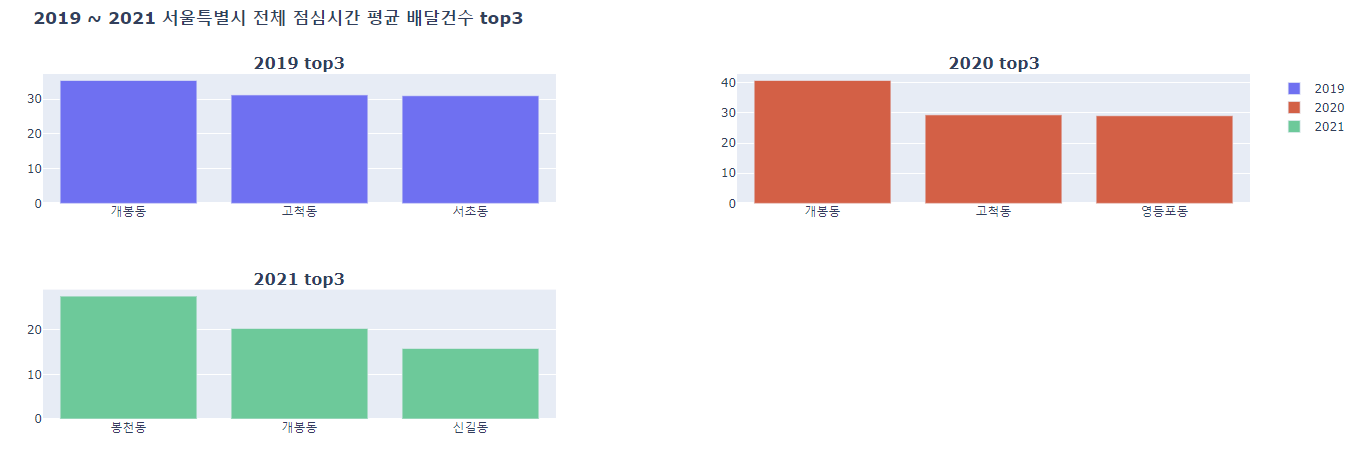

서울특별시를 입력한뒤 구로구를 선택하면 아래와 같은 그래프가 나온다. '전체'를 입력했을 때와 달리 구로구의 데이터만 볼 수 있다.

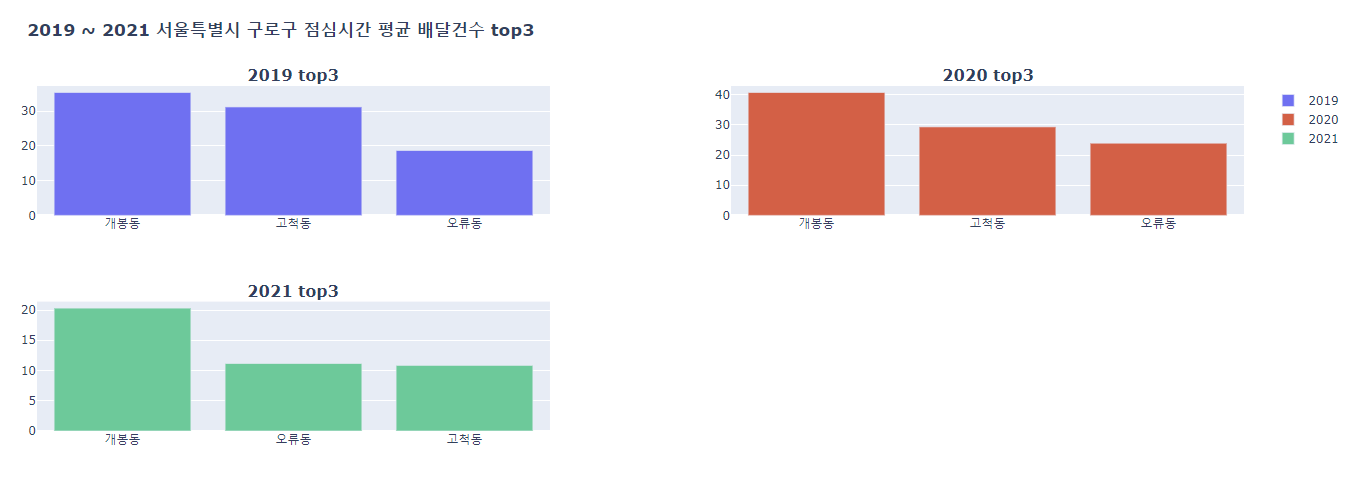

In [ ]:
dataFrame = df[df['광역시도']=='서울특별시']
dataFrame = dataFrame[dataFrame['시군구']=='용산구']
dataFrame_year = dataFrame[(dataFrame['날짜'].dt.year==2019) & (dataFrame['시간대']>=11) &(dataFrame['시간대']<=13)]
print(dataFrame_year.size)
# dataFrame_year = dataFrame_year.groupby('읍면동')['시간대','배달건수'].mean().sort_values(by='배달건수',ascending=False).head(3)
# dataFrame_year

0


### 데이터 특이사항
* 세종특별자치시는 시군구 데이터가 '\N'이다.
* 세종특별자치시는 2021년 데이터에 조치원읍 밖에 없다.
* 서울 특별시 용산구는 2019년도의 점심시간(11~13) 데이터가 없다.
* 전주시 덕진구는 데이터에 존재하지 않는다.
* 서울시 송파구는 2021년 데이터가 존재하지 않는다. 2020년 데이터도 단 3개인데 모두 12시이다.

In [ ]:
# Map 함수를 사용하여 지도를 출력합니다.
map_osm = folium.Map(location=[37.529622, 126.984307], zoom_start=11)

map_osm

아직 지도위에 표시하기는 무리,,,전국의 각 읍면동 단위의 경도와 위도 정보를 담은 csv가 필요할 것 같다.

카카오 API를 이용해서 만들 수 있을까 : <br>
https://developers.kakao.com/docs/latest/ko/local/dev-guide#search-by-keyword<br>
https://developers.kakao.com/docs/latest/ko/local/dev-guide#address-coord

=> 더 나아가서 이미 주변에 있는 맛집을 카카오 API 키워드 검색을 이용해서 추가로 보여주면 어떨까?

## 3.2 서울 월별

**계획**
* (서울지역) 같은 연도에서 어떤 월이 가장 배달을 많이 시켜먹었는지 월별 합 구하기
* (서울지역) 2019~2021 데이터를 월별로 묶고 같은 월끼리 비교하기
* (서울지역) 2019~2021 데이터를 월별로 묶고, 시간대 별로 묶어서 해당 월의 각 시간대의 배달건수 증감 그래프에 나타내기


  ⇒ *월 12 x 시간대 24 개를 모두 나타내면 복잡할 것 같으므로 top3만 각각 뽑아서 보여주는건 어떨지?*
* 2019~2021 서울시 용산구의 배달 주문량을 bar그래프로 (x:시간대, y:배달건수)
<br/>

> plotly를 이용해 그래프 그릴 때 참고하면 좋은 블로그 
https://chancoding.tistory.com/96




In [ ]:
df_yongsan

,시간대,배달건수
0,0,11
1,9,701
2,10,1537
3,11,1948
4,12,1284
5,13,919
6,14,739
7,15,614
8,16,670
9,17,1029


In [ ]:
#2019년도 서울데이터를 월별로 모으고 시간대별 합 구하기
df_seoul_2019_month = df_2019[df_2019['광역시도']=='서울특별시'].groupby([pd.Grouper(key='날짜', freq='1M'), '시간대']).sum().reset_index()
df_seoul_2019_month

,날짜,시간대,배달건수
0,2019-08-31,0,2146
1,2019-08-31,1,954
2,2019-08-31,2,146
3,2019-08-31,3,1
4,2019-08-31,9,217
...,...,...,...
110,2019-12-31,19,22077
111,2019-12-31,20,16881
112,2019-12-31,21,13390
113,2019-12-31,22,10257


8월에는 4~8 시간대의 배달 데이터가 존재하지 않음.

> **(서울지역) 같은 연도에서 어떤 월이 가장 배달을 많이 시켜먹었는지 월별 합 or 평균 구하기**



In [ ]:
def month_sum(yyyy, mm):
  if yyyy==2019:
    monthFrame = df_2019[df_2019['광역시도']=='서울특별시'].groupby([pd.Grouper(key='날짜', freq='1M'), '시간대']).mean().reset_index()
  elif yyyy==2020:
    monthFrame =  df_2020[df_2020['광역시도']=='서울특별시'].groupby([pd.Grouper(key='날짜', freq='1M'), '시간대']).mean().reset_index()
  elif yyyy==2021:
    monthFrame = df_2021[df_2021['광역시도']=='서울특별시'].groupby([pd.Grouper(key='날짜', freq='1M'), '시간대']).mean().reset_index()
  
  if mm in [4,6,9,11] :
    end_date = str(yyyy) + "-" + str(mm) + "-" + "30" 
  elif yyyy == 2020 and mm == 2: #2020년은 윤년이다.
    end_date = str(yyyy) + "-" + str(mm) + "-" + "29"
  elif mm==2:
    end_date = str(yyyy) + "-" + str(mm) + "-" + "28"
  else : 
    end_date = str(yyyy) + "-" + str(mm) + "-" + "31" 
  
  return monthFrame[monthFrame['날짜']==end_date].mean()

In [ ]:
seoul_mSum_2019 ={}
seoul_mSum_2020 ={}
seoul_mSum_2021 ={}

#2019
for i in range(8,13):
  seoul_mSum_2019[i] = month_sum(2019, i)['배달건수']

#2020
for i in range(1,13):
  seoul_mSum_2020[i] = month_sum(2020, i)['배달건수']

#2021
#2021년은 1월 1일부터 8월 31까지 존재
for i in range(1,9):
  seoul_mSum_2021[i] = month_sum(2021, i)['배달건수']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [ ]:
seoul_mSum_2021

{1: 9.199313433031337,
 2: 8.558062920769512,
 3: 7.530493733938495,
 4: 4.9520507106928955,
 5: 5.667364944041206,
 6: 4.940652779519108,
 7: 5.9621815351916,
 8: 5.4773492785842075}

In [ ]:
list(seoul_mSum_2021.keys())

[1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
#colab결과창에 그래프를 띄운다.
configure_plotly_browser_state()

init_notebook_mode(connected=True)

#그래프 하나만 그릴 때 
dict_of_fig = dict({
    "data": [{"type": "scatter",
              "x": list(seoul_mSum_2019.keys()),
              "y": list(seoul_mSum_2019.values())}],
    "layout": {"title": {"text": "서울시 2019 월별 주문량"},
               }
})
fig = go.Figure(dict_of_fig)

In [ ]:
#여러 그래프 겹쳐 그리기
configure_plotly_browser_state()

init_notebook_mode(connected=True)

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(seoul_mSum_2019.keys()), y=list(seoul_mSum_2019.values()), 
                                mode='lines+markers', name="서울시 2019 월별 배달량"))
fig.add_trace(go.Scatter(x=list(seoul_mSum_2020.keys()), y=list(seoul_mSum_2020.values()), 
                                mode='lines+markers', name="서울시 2020 월별 배달량"))
fig.add_trace(go.Scatter(x=list(seoul_mSum_2021.keys()), y=list(seoul_mSum_2021.values()), 
                                mode='lines+markers', name="서울시 2021 월별 배달량"))


fig.update_xaxes(title_text="월")
fig.update_yaxes(title_text="배달 건수")

fig.update_layout(title='<b>2019 ~ 2020 서울시 월별 배달 추이</b>')             
fig.show()